
# Project: TMDb Movie Data Anlaysis

#### [DAND] 2020.07 08 HyunGyung Lee

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project I'll solve  several questions analzing **TMDB movie dataset**. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.   

As analyze the dataset, I expected to find some findings about what makes succssful movies. Questions are below.

---

1. Which genres are most popular from year to year?


2. What kinds of movie properties are associated with movies revenues?


3. Who are the 10 most commercially successful main actor?


4. For all movie stars who were casted as main actor in 20th that are still being casted in 21st how much has the movie revenue improved?
---

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### General Properties

The TMDB data General properties are as follows. First of all the data contains variables related to movies. There are total 21 columns and 10866 rows in the data set.

Some of variables that will not be used in this analysis, so you will have to drop them. 

For missing values, it can be found in several columns, such as cast, homepage, and director ect,. Fortunatly, the data types in all columns are correct, so it is not necessary to clean them.

There are some columns like genres, production_companies, etc, have multiple vaules sold by '|'. So these data are needed to be cleaned. 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Descriptive statistics are the summarized values of each column. Particularly noteworthy here is 'budget' and 'revenue'(including budjed_adj, revenue_adj). For these two variables, it can be seen that about 50% of value is zero.

Too many columns with a value of 0 for 'budget' and 'revenue' may result in under estimated of data analysis, which may result in bias in the analysis. For further research, these rows with 0 should be cleaned.

In [5]:
sum(df['revenue'] * df['budget'] * df['revenue_adj'] * df['budget_adj'] ==  0)

7011

There are 7011 data which has 0



### Data Cleaning 


The data cleaning to be performed for analysis is as follows

1. Drop columns that will not be used for analysis. 

2. Checking and drop data with zero values and missing values

3. Drop duplicates

4. Fix columns containing multiple values

#### 1. Drop columns that will not be used for analysis

Drop unused columns 

(imdb_id', 'homepage','director', 'tagline', 'keywords','overview','production_companies', 'release_date')

In [6]:
# drop columns

df = df.drop(['imdb_id', 'homepage', 'director', 'tagline', 'keywords', 
         'overview', 'production_companies', 'release_date'], axis = 1 )

In [7]:
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2. Checking and drop data with zero values and missing values

In [8]:
# replace 0 to NAN

df = df.replace(0, np.NaN)
print(df.isnull().sum())

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
runtime             31
genres              23
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64


In [9]:
# drop missing data

df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3851 non-null   int64  
 1   popularity      3851 non-null   float64
 2   budget          3851 non-null   float64
 3   revenue         3851 non-null   float64
 4   original_title  3851 non-null   object 
 5   cast            3851 non-null   object 
 6   runtime         3851 non-null   float64
 7   genres          3851 non-null   object 
 8   vote_count      3851 non-null   int64  
 9   vote_average    3851 non-null   float64
 10  release_year    3851 non-null   int64  
 11  budget_adj      3851 non-null   float64
 12  revenue_adj     3851 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 421.2+ KB
None


#### 3. Drop Duplicates

In [10]:
# Check for duplicates in the data

sum(df.duplicated())

1

In [11]:
# drop duplicates

df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

#### 4. Fix columns containing multiple values

columns: Genres, actor

In [12]:
# Leave one value(main actor) in cast column

df['cast'] = df['cast'].str.split('|', expand=True)[0]

df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
# Leave one value(main genre) in genres column

df['genres'] = df['genres'].str.split('|', expand=True)[0]

df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,120.0,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,119.0,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,136.0,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,137.0,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### RQ1. Which genres are most popular from year to year?


In this part, I'm going to check a list of the most popular genres from year to year. To solve this problem, two methods were applied:

1. Select the popular genre according to the number movies of each genres released each year

2. Select the popular genre according to the mean popularity each year

#### 1. Select the popular genre according to the number movies of each genres released each year

In [14]:
# Groupby two columns and get maximun count value
# code ref: https://stackoverflow.com/questions/45161355/pandas-dataframe-find-the-max-after-groupby-two-columns-and-get-counts

genres_year = df.groupby(['release_year', 'genres'], as_index = False )['id'].count()
genres_year

,release_year,genres,id
0,1960,Action,2
1,1960,Comedy,2
2,1960,Drama,1
3,1961,Action,1
4,1961,Adventure,1
...,...,...,...
587,2015,Romance,6
588,2015,Science Fiction,5
589,2015,Thriller,9
590,2015,War,1


In [15]:
genres_result1 = genres_year.groupby('release_year').apply(lambda x: x.genres[x.id.idxmax()])
genres_result1

release_year
1960       Action
1961       Comedy
1962    Adventure
1963       Action
1964        Drama
1965        Drama
1966       Action
1967        Crime
1968    Adventure
1969    Adventure
1970       Action
1971       Action
1972       Action
1973        Crime
1974       Action
1975        Drama
1976        Drama
1977        Drama
1978        Drama
1979        Drama
1980       Horror
1981        Drama
1982        Drama
1983       Comedy
1984       Action
1985       Action
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990       Action
1991       Action
1992       Action
1993        Drama
1994       Comedy
1995       Action
1996        Drama
1997        Drama
1998       Comedy
1999       Comedy
2000       Comedy
2001       Action
2002        Drama
2003        Drama
2004       Comedy
2005        Drama
2006        Drama
2007       Comedy
2008        Drama
2009       Comedy
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Dra

It can be seen that lots of the drama genre movies were released in most years. Action movies was released the most frequently in 1960 and 1963. The graph of the number of most released movie genre from 1960 to 2015 is as follows.

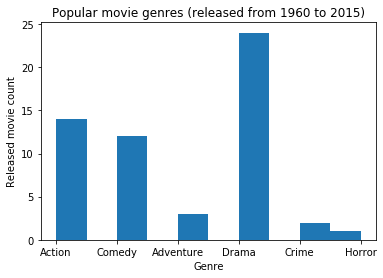

In [16]:
plt.hist(genres_result1)
plt.title("Popular movie genres (released from 1960 to 2015)")
plt.xlabel("Genre")
plt.ylabel("Released movie count");

#### 2. Select the popular genre according to the mean popularity each year

In [17]:
genres_year2 = df.groupby(['release_year', 'genres'], as_index = False).popularity.mean()
genres_year2

,release_year,genres,popularity
0,1960,Action,1.504538
1,1960,Comedy,0.501564
2,1960,Drama,2.610362
3,1961,Action,0.754548
4,1961,Adventure,2.631987
...,...,...,...
587,2015,Romance,2.561794
588,2015,Science Fiction,4.871351
589,2015,Thriller,1.721857
590,2015,War,5.476958


In [18]:
genres_result2 = genres_year2.groupby('release_year').apply(lambda x: x.genres[x.popularity.idxmax()])
genres_result2

release_year
1960              Drama
1961          Adventure
1962          Adventure
1963             Action
1964          Adventure
1965          Adventure
1966              Drama
1967             Family
1968    Science Fiction
1969            History
1970          Animation
1971    Science Fiction
1972              Drama
1973          Animation
1974              Drama
1975             Horror
1976              Crime
1977          Adventure
1978              Music
1979             Horror
1980          Adventure
1981            Romance
1982    Science Fiction
1983          Adventure
1984            Fantasy
1985          Adventure
1986          Animation
1987    Science Fiction
1988            Fantasy
1989          Animation
1990            Romance
1991            Romance
1992          Animation
1993            Fantasy
1994             Family
1995          Animation
1996             Family
1997          Animation
1998          Animation
1999            Mystery
2000             Family
200

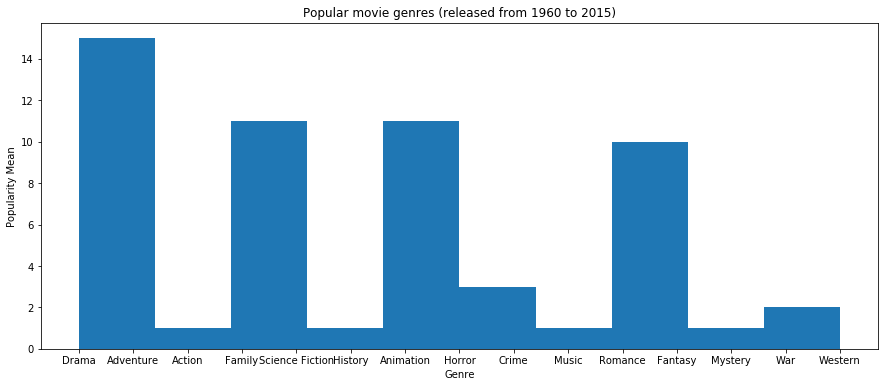

In [19]:
# view plot
plt.figure(figsize = (15,6))
plt.hist(genres_result2)
plt.title("Popular movie genres (released from 1960 to 2015)")
plt.xlabel("Genre")
plt.ylabel("Popularity Mean");

The list of the most famous movies selected by mean popularity is as above. It can be seen that movies of various genres are listed rather than the previous result.
Similiarly the drama genre had the highest mean popularity in most years. 

### RQ2.  What kinds of movie properties are associated with movies revenues?

Many properties are expected to associated the movie revenue. in this part, the analysis shows the correlation between movie revue and other variables. Dependent variables are popularity, budget, runtime, vote_count, and vote_average.

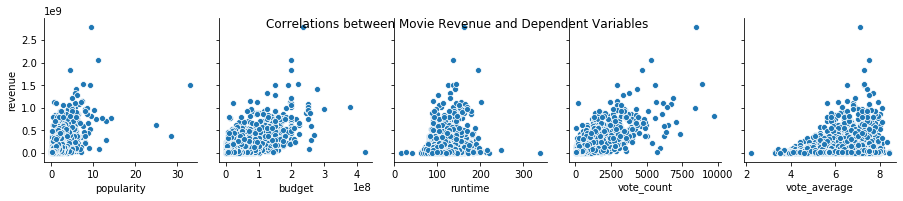

In [20]:
g =sns.pairplot(df, x_vars = ['popularity', 'budget', 'runtime',
                           'vote_count', 'vote_average'], 
             y_vars = 'revenue') ;
g.fig.suptitle("Correlations between Movie Revenue and Dependent Variables") ;

From this the correlation is mostly not strong among DVs. In particular, popularity, runtime, and vote_average are revenue and not correlated with revenue. On the other hand, for the Budget and the vote_count, it is correlated with the revenue, but its strength is weak.

### RQ3.  Who are the 10 most commercially successful main actor?

In [21]:
# find top 10 casts

success_actor = df.groupby(['cast'], as_index = False ).revenue_adj.mean()
success_actor.sort_values(by=['revenue_adj'], ascending = False).head(10)

,cast,revenue_adj
894,Mark Hamill,1.822719e+09
517,Henry Thomas,1.791694e+09
1157,Rod Taylor,1.574815e+09
709,Jonathan Taylor Thomas,1.159592e+09
857,Linda Blair,1.138977e+09
251,Chris Pratt,1.052369e+09
736,Julie Andrews,9.242697e+08
1198,Sam Neill,9.215062e+08
1201,Sam Worthington,8.474021e+08
1408,William Moseley,8.360904e+08


In [22]:
# check out Mark Hamill's movie

temp = df.loc[ df['cast'] == "Mark Hamill" ]
temp

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill,121.0,Adventure,4428,7.9,1977,3.957559e+07,2.789712e+09
7309,1891,5.488441,18000000.0,538400000.0,The Empire Strikes Back,Mark Hamill,124.0,Adventure,3954,8.0,1980,4.762866e+07,1.424626e+09
7987,1892,4.828854,32350000.0,572700000.0,Return of the Jedi,Mark Hamill,135.0,Adventure,3101,7.8,1983,7.082424e+07,1.253819e+09


>May the Force be with you.

Since TMDB data included movies from 1960 to 2015, the revnue_adj variable was used to solve RQ3 to assess the commercial performance of actors equally over time. The results were obtained as shown in the table above.
*The final two columns ending with "adj" show the Budget and revue of the association movie in terms of 2010 dollars,
counting for inflation over time.* 

### RQ4.  For all movie stars who were casted as main actor in 20th century that are still being casted in 21st how much has the movie revenue improved?

In [23]:
# Divide data into two(20th, 21th) by release_year

df_20 = df.loc[df['release_year'] <= 2000 ]
df_21 = df.loc[df['release_year'] > 2000 ]

In [24]:
# check dataset of 20th movies

df_20.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill,121.0,Adventure,4428,7.9,1977,3.957559e+07,2.789712e+09
1330,691,2.379469,14000000.0,185438673.0,The Spy Who Loved Me,Roger Moore,125.0,Adventure,279,6.2,1977,5.036893e+07,6.671677e+08
1331,11319,1.719385,1200000.0,71215869.0,The Rescuers,Bob Newhart,78.0,Fantasy,332,6.6,1977,4.317337e+06,2.562191e+08
1332,703,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen,93.0,Comedy,493,7.6,1977,1.439112e+07,1.376203e+08
1334,840,1.104816,20000000.0,303788635.0,Close Encounters of the Third Kind,Richard Dreyfuss,135.0,Science Fiction,600,7.0,1977,7.195562e+07,1.092965e+09


In [25]:
# check dataset of 21th movies

df_21.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,120.0,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,119.0,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,136.0,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,137.0,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
# Save divided datasets as new files 
# to make new merged file

df_20.to_csv('new_20.csv', index=False)
df_21.to_csv('new_21.csv', index=False)

In [27]:
# load dataset

new_20 = pd.read_csv('new_20.csv')
new_21 = pd.read_csv('new_21.csv')

In [28]:
# rename 20th columns

new_20.rename(columns = lambda x: x + "_20", inplace=True)

In [29]:
# view to check names
new_20.head()

,id_20,popularity_20,budget_20,revenue_20,original_title_20,cast_20,runtime_20,genres_20,vote_count_20,vote_average_20,release_year_20,budget_adj_20,revenue_adj_20
0,11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill,121.0,Adventure,4428,7.9,1977,3.957559e+07,2.789712e+09
1,691,2.379469,14000000.0,185438673.0,The Spy Who Loved Me,Roger Moore,125.0,Adventure,279,6.2,1977,5.036893e+07,6.671677e+08
2,11319,1.719385,1200000.0,71215869.0,The Rescuers,Bob Newhart,78.0,Fantasy,332,6.6,1977,4.317337e+06,2.562191e+08
3,703,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen,93.0,Comedy,493,7.6,1977,1.439112e+07,1.376203e+08
4,840,1.104816,20000000.0,303788635.0,Close Encounters of the Third Kind,Richard Dreyfuss,135.0,Science Fiction,600,7.0,1977,7.195562e+07,1.092965e+09


In [30]:
# merge datasets

new_combined = new_20.merge(new_21, left_on='cast_20', right_on='cast', how='inner')

In [31]:
# vies to check merge

new_combined.head()

,id_20,popularity_20,budget_20,revenue_20,original_title_20,cast_20,runtime_20,genres_20,vote_count_20,vote_average_20,...,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta,118.0,Drama,192,6.3,...,52615806.0,From Paris with Love,John Travolta,92.0,Action,432,6.1,2010,5.200000e+07,5.261581e+07
1,11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta,118.0,Drama,192,6.3,...,147080413.0,Swordfish,John Travolta,99.0,Action,606,6.0,2001,1.256118e+08,1.811278e+08
2,11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta,118.0,Drama,192,6.3,...,54249294.0,Domestic Disturbance,John Travolta,89.0,Mystery,50,5.4,2001,9.236161e+07,6.680736e+07
3,11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta,118.0,Drama,192,6.3,...,309979994.0,Bolt,John Travolta,96.0,Animation,1119,6.3,2008,1.519180e+08,3.139436e+08
4,11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta,118.0,Drama,192,6.3,...,42792561.0,Basic,John Travolta,98.0,Action,153,6.0,2003,5.926763e+07,5.072428e+07


Create a new dataframe, `model_cast`, that contain the mean revenue_adj values in 20th and 21th for each actors

In [32]:
model_cast = new_combined.groupby('cast').mean()[['revenue_adj_20', 'revenue_adj']]

In [33]:
model_cast.head()

,revenue_adj_20,revenue_adj
cast,,
Adam Sandler,1.632608e+08,1.904091e+08
Al Pacino,1.559774e+08,3.996862e+07
Albert Brooks,6.447725e+07,1.024887e+09
Alex D. Linz,1.074305e+08,2.129536e+07
Ally Sheedy,1.958482e+07,7.570313e+05


In [34]:
# create a new column, revenue_adj_change, with the change of revenue

model_cast['revenue_adj_change'] = model_cast['revenue_adj'] - model_cast['revenue_adj_20']

In [35]:
model_cast.head()

,revenue_adj_20,revenue_adj,revenue_adj_change
cast,,,
Adam Sandler,1.632608e+08,1.904091e+08,2.714826e+07
Al Pacino,1.559774e+08,3.996862e+07,-1.160088e+08
Albert Brooks,6.447725e+07,1.024887e+09,9.604094e+08
Alex D. Linz,1.074305e+08,2.129536e+07,-8.613510e+07
Ally Sheedy,1.958482e+07,7.570313e+05,-1.882779e+07


In [36]:
model_cast.shape

(198, 3)

According to the result, total 198 actors appeared both in movies of the 20th and 21st. The revenue_adj_change column indicates whether their movie revenue have increased or decreased. 

Because the number of actors is so large, this study attempts to graph only 10 actors randomly.

In [37]:
# select 10 casts randomly
random_cast = model_cast.sample(10)
random_cast

,revenue_adj_20,revenue_adj,revenue_adj_change
cast,,,
Sarah Polley,3.724468e+07,1.181649e+08,8.092018e+07
Hugh Grant,1.339168e+08,9.084079e+07,-4.307599e+07
Will Smith,4.910383e+08,3.520918e+08,-1.389465e+08
Ice Cube,5.806746e+07,8.129423e+07,2.322677e+07
Christian Bale,4.339148e+07,2.682872e+08,2.248957e+08
Mike Myers,1.763979e+08,6.088733e+08,4.324754e+08
Alex D. Linz,1.074305e+08,2.129536e+07,-8.613510e+07
Adam Sandler,1.632608e+08,1.904091e+08,2.714826e+07
Rob Schneider,8.578887e+07,6.470391e+07,-2.108496e+07


In [38]:
# plot bars

ind = np.arange(len(random_cast))  # the x locations for the groups
width = 0.35       # the width of the bars

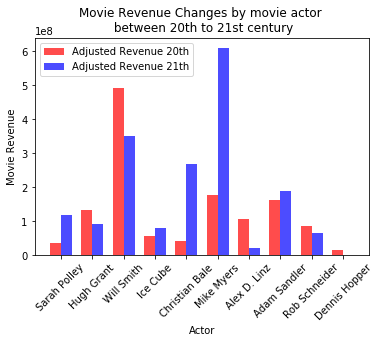

In [39]:
# plot bars
red_bars = plt.bar(ind, random_cast['revenue_adj_20'], width, color='r', alpha=.7, label='Adjusted Revenue 20th')
white_bars = plt.bar(ind + width, random_cast['revenue_adj'], width, color='b', alpha=.7, label='Adjusted Revenue 21th')

# title and labels
plt.ylabel('Movie Revenue')
plt.xlabel('Actor')
plt.title('Movie Revenue Changes by movie actor \n between 20th to 21st century')
locations = ind + width / 2  # xtick locations

# code ref.
# https://thispointer.com/python-pandas-how-to-get-column-and-row-names-in-dataframe/
labels = random_cast.index.values

# code ref.
#https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(locations, labels, rotation=45)


# legend
plt.legend()

<a id='conclusions'></a>
## Conclusions

The conclusions of this project are as follows.

First, RQ1 checked the most popular movie genre from 1960 to 2015. Drama genre was found to be the most popular.The variety of genres was higher in the model choosing popular genres with mean_popularity than the model choosing popular genres with the number of released movies.

The movie properties, which correlate with the film revenue, were budget and vote_count. Other variables may be expected to be uncorrelated to the revenue.

Mark Hamill was the most commercially successful actor found through TMDB data. Further this project suggested a list of the top 10 commercially successful actors.

Finally, RQ4 was about how much the actor's movie 'revenue' changed who starred in both 20th and 21st-century films. Al Pacino performed better in the 20th century than in the 21st century but Adam Sandler was marked by commercial success in the 21st century.

#### Limitations

 Only one representative value was selected for genres and cast variable for analysis. This method is limited in that it causes data loss and is difficult to accurately analyze.

 In addition, droping data with 0 values which was half of original data is another limitation. In fact, the original source of this data, keggle, the opening question for 0 values was raised as below. In this regard, this analysis was followed the method of processing 0 as missing data. But this is a way to lose a lot of data and make it impossible to analyze zero-value movies.

> This dataset hasn't yet gone through a data quality analysis. Can you find any obvious corrections? For example, in the IMDb version it was necessary to treat values of zero in the budget field as missing. Similar findings would be very helpful to your fellow Kagglers! (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).
(https://www.kaggle.com/tmdb/tmdb-movie-metadata)